# Úvod

Tento dataset si klade za cíl analyzovat veřejné preference mezi dvěma typy oblíbenými destinacemi dovolené: horami a plážemi. Poskytuje přehled o různých demografických a životních faktorech, které mohou ovlivnit tyto preference. Prozkoumáním tohoto datasetu mohou uživatelé aplikovat různé techniky strojového učení k predikci, zda jednotlivci preferují hory nebo pláže na základě jejich vlastností.

Odkaz na dataset: [Mountains vs Beaches Preferences](https://www.kaggle.com/datasets/jahnavipaliwal/mountains-vs-beaches-preference)

# Načtení knihoven

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explorační analýza dat (Exploratory Data Analysis - EDA)

## Datový slovník

| **Pojem**                  | **Popis**                                  | **Typ**                                                |
|:---------------------------|:-------------------------------------------|:-------------------------------------------------------|
| **Age**                    | Věk jednotlivce                            | Numerický                                              |
| **Gender**                 | Genderová identita jednotlivce             | Kategorický: muž, žena, nebinární                      |
| **Income**                 | Roční příjem jednotlivce                   | Numerický                                              |
| **Education Level**        | Nejvyšší dosažené vzdělání                 | Kategorický: střední škola, bakalář, magistr, doktorát |
| **Travel Frequency**       | Počet dovolených za rok                    | Numerický                                              |
| **Preferred Activities**   | Aktivity preferované během dovolené        | Kategorický: turistika, plavání, lyžování, opalování   |
| **Vacation Budget**        | Rozpočet vyhrazený na dovolené             | Numerický                                              |
| **Location**               | Typ bydliště                               | Kategorický: městský, příměstský, venkovský            |
| **Proximity to Mountains** | Vzdálenost k nejbližším horám (v mílích)   | Numerický                                              |
| **Proximity to Beaches**   | Vzdálenost k nejbližším plážím (v mílích)  | Numerický                                              |
| **Favorite Season**        | Preferované roční období pro dovolenou     | Kategorický: léto, zima, jaro, podzim                  |
| **Pets**                   | Zda jednotlivec vlastní domácí zvířata     | Binární: 0 = Ne, 1 = Ano                               |
| **Environmental Concerns** | Zda jednotlivec má environmentální obavy   | Binární: 0 = Ne, 1 = Ano                               |
| **Preference**             | Preference mezi horami a plážemi           | Binární: 1 = Hory, 0 = Pláže                           |

## Načtení dat

In [2]:
df = pd.read_csv('../datasets/projects/mountains_vs_beaches_preferences.csv')
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


## Základní informace o datasetu

### Počet záznamů a atributů

In [3]:
print(f"Počet záznamů: {df.shape[0]}\nPočet atributů: {df.shape[1]}")

Počet záznamů: 52444
Počet atributů: 14


In [4]:
df.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


### Datové typy atributů

In [5]:
df.dtypes

Age                        int64
Gender                    object
Income                     int64
Education_Level           object
Travel_Frequency           int64
Preferred_Activities      object
Vacation_Budget            int64
Location                  object
Proximity_to_Mountains     int64
Proximity_to_Beaches       int64
Favorite_Season           object
Pets                       int64
Environmental_Concerns     int64
Preference                 int64
dtype: object

#### Numerické atributy

##### Binární atributy

In [6]:
binary_columns = ['Pets', 'Environmental_Concerns', 'Preference']
print("\n".join(binary_columns))

Pets
Environmental_Concerns
Preference


##### Nebinární atributy

In [7]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [column for column in numerical_columns if column not in binary_columns]
print("\n".join(numerical_columns))

Age
Income
Travel_Frequency
Vacation_Budget
Proximity_to_Mountains
Proximity_to_Beaches


S numeryckými atributy můžeme provést následující analýzy:
- Rozdělení hodnot
- Korelace mezi atributy
- Distribuce hodnot
- Normalizace hodnot
- Transformace hodnot

#### Kategorické atributy

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

Gender: ['male' 'female' 'non-binary']
Education_Level: ['bachelor' 'master' 'high school' 'doctorate']
Preferred_Activities: ['skiing' 'swimming' 'hiking' 'sunbathing']
Location: ['urban' 'suburban' 'rural']
Favorite_Season: ['summer' 'fall' 'winter' 'spring']


V kategorických atributehc nemáme žádné zbytečné hodnoty, které by bylo třeba odstranit. Každý z nich má svůj význam a předpokládame, že budou důležité pro analýzu. Další zpracování bude zahrnuto v dalších krocích.

### Chybějící hodnoty

In [9]:
missing_values = int(df.isnull().sum().sum())
missing_values

0

Paráda, v datasetu nejsou žádné chybějící hodnoty.

### Duplicitní záznamy

In [10]:
duplicates = int(df.duplicated().astype(int).sum())
duplicates

0

Skvělé, v datasetu nejsou ani žádné duplicitní záznamy.

## Vizualizace dat

### Distribuce kategorických atributů

In [11]:
def plot_summary_categorical(_df, _column):
    print(pd.DataFrame({"Počet záznamů": _df[_column].value_counts(),
                        "Podíl záznamů (%)": _df[_column].value_counts(normalize=True) * 100}))

    values = _df[_column].value_counts()
    colors = sns.color_palette("viridis", len(values))

    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    sns.countplot(data=_df, x=_df[_column], hue=_df[_column], palette=colors, legend=False)
    plt.title(f"Počet záznamů pro kategorický atribut: {_column}")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(x=values, labels=values.index, autopct="%.1f%%", startangle=90, colors=colors)
    plt.title(f"Podíl záznamů pro kategorický atribut: {_column}")

    plt.legend()
    plt.show()

            Počet záznamů  Podíl záznamů (%)
Gender                                      
female              17638          33.632065
male                17522          33.410876
non-binary          17284          32.957059


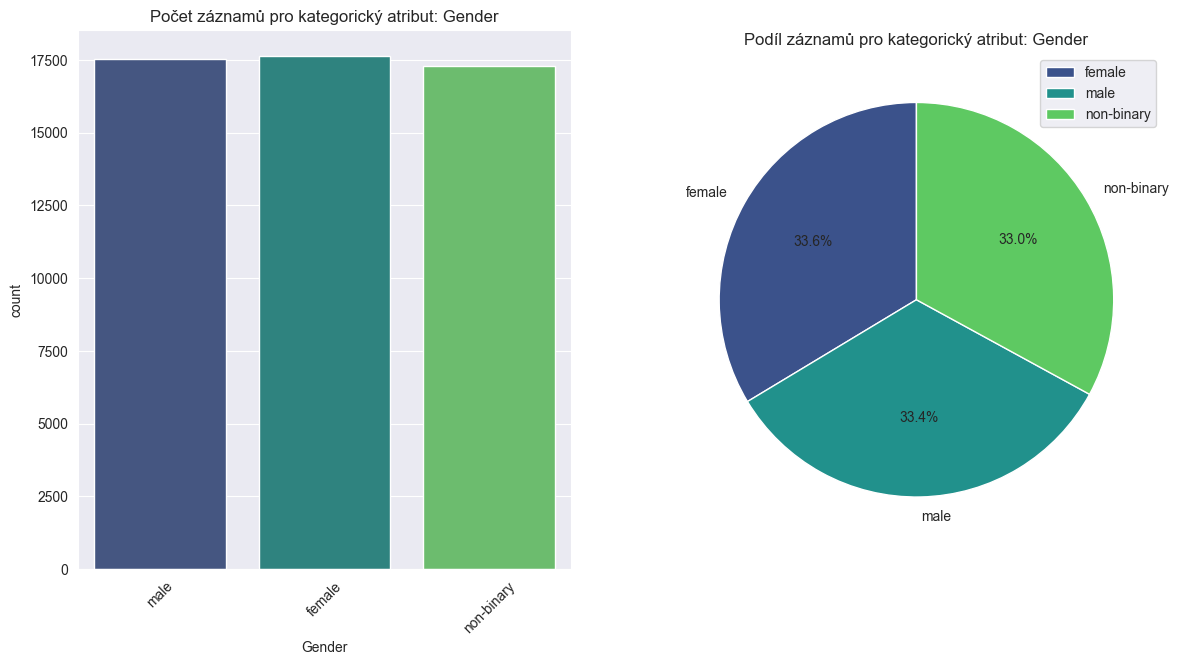

                 Počet záznamů  Podíl záznamů (%)
Education_Level                                  
doctorate                13293          25.347037
bachelor                 13127          25.030509
high school              13072          24.925635
master                   12952          24.696819


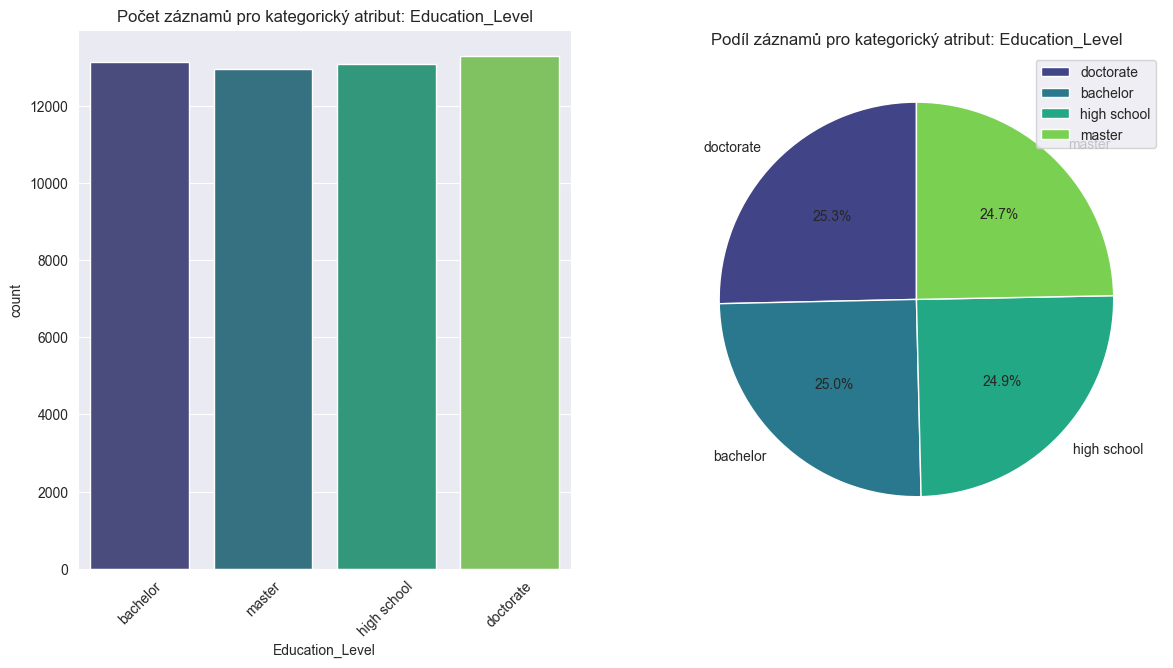

                      Počet záznamů  Podíl záznamů (%)
Preferred_Activities                                  
sunbathing                    13221          25.209748
skiing                        13167          25.106781
hiking                        13102          24.982839
swimming                      12954          24.700633


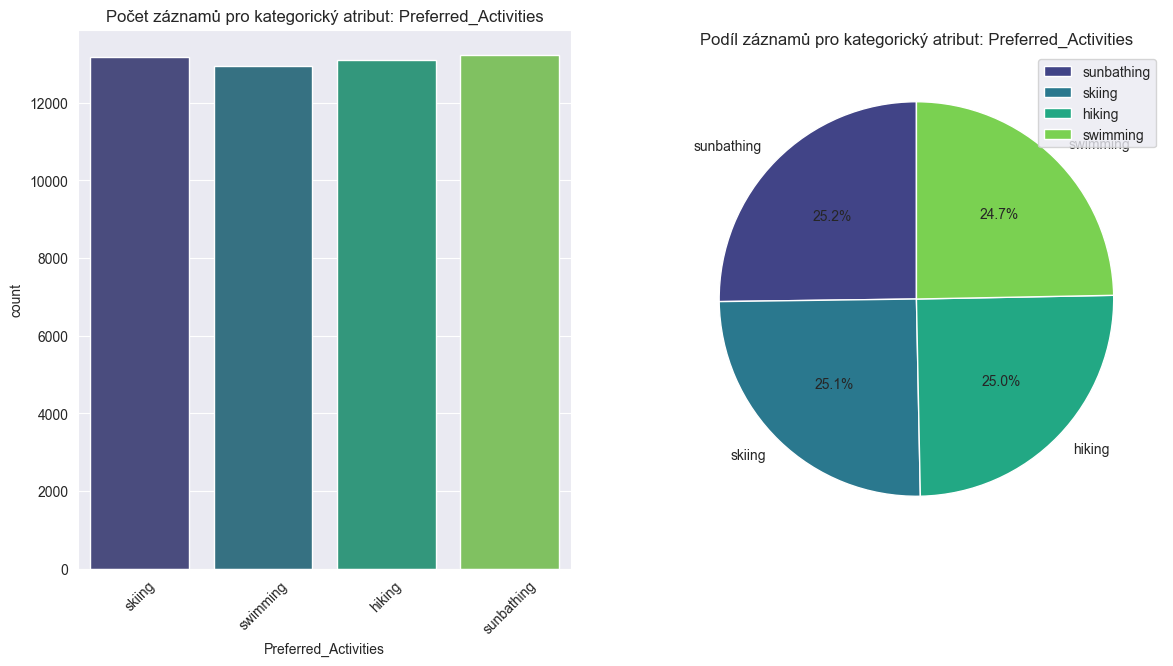

          Počet záznamů  Podíl záznamů (%)
Location                                  
suburban          17503          33.374647
urban             17476          33.323164
rural             17465          33.302189


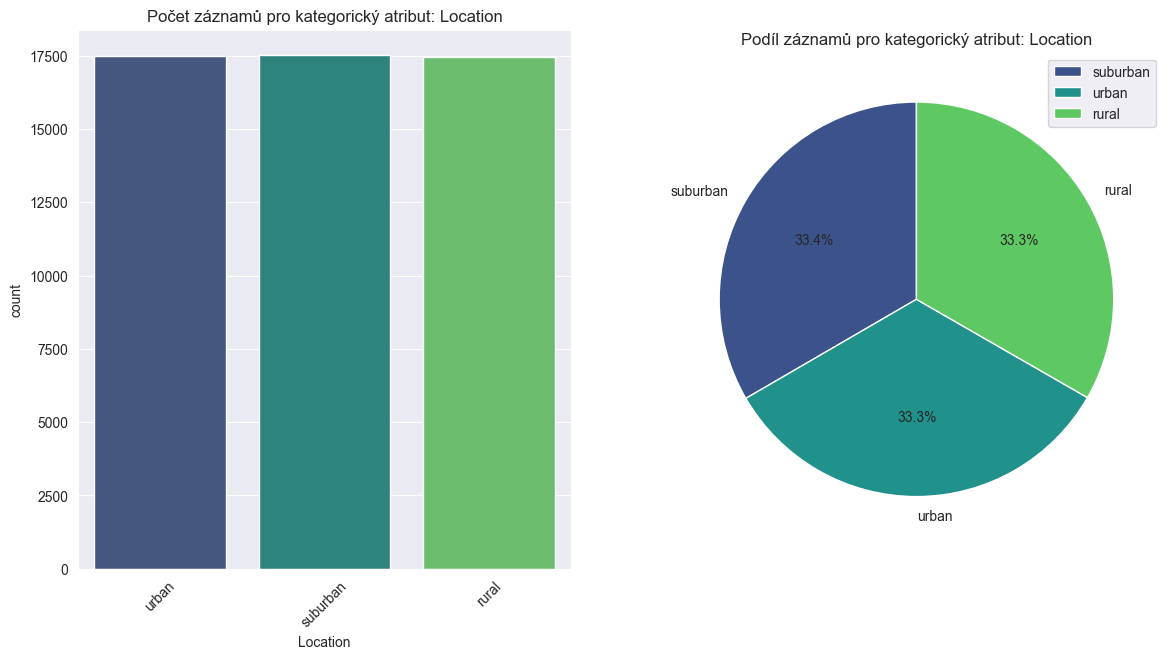

                 Počet záznamů  Podíl záznamů (%)
Favorite_Season                                  
summer                   13303          25.366105
fall                     13170          25.112501
winter                   13019          24.824575
spring                   12952          24.696819


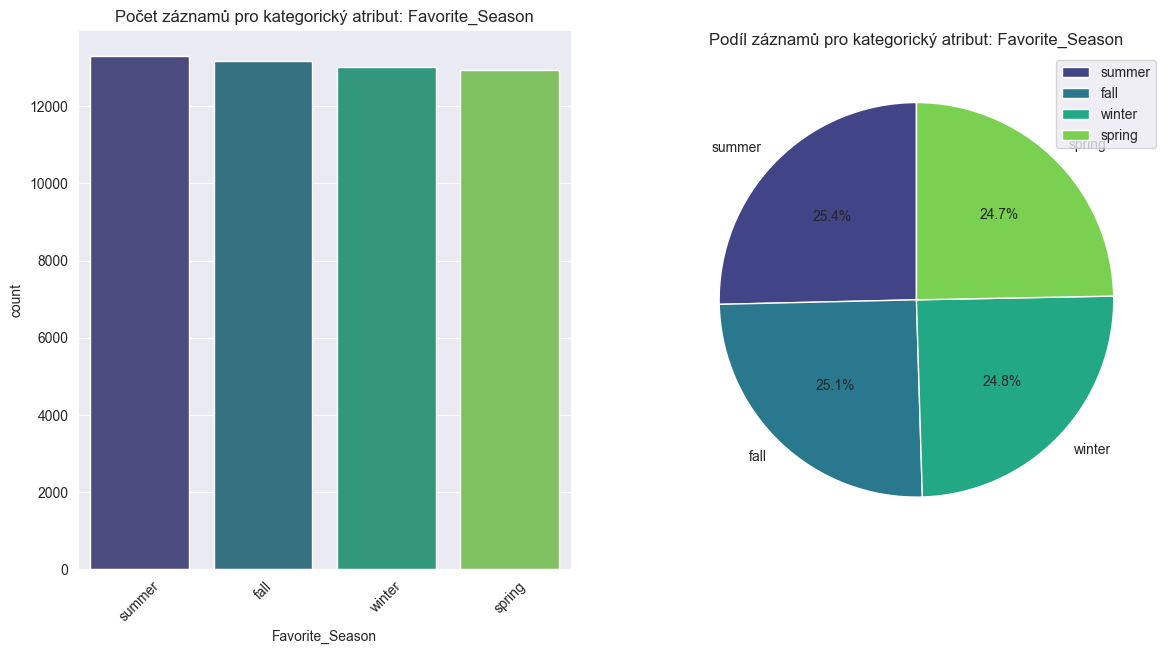

In [12]:
for column in categorical_columns:
    plot_summary_categorical(df, column)

### Atribut vs Preference

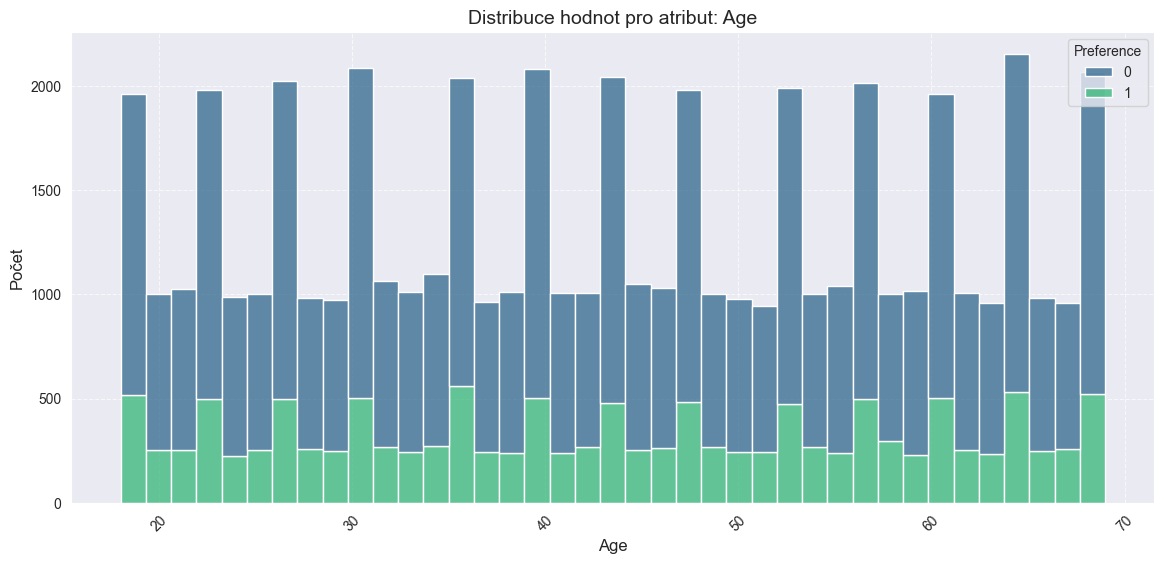

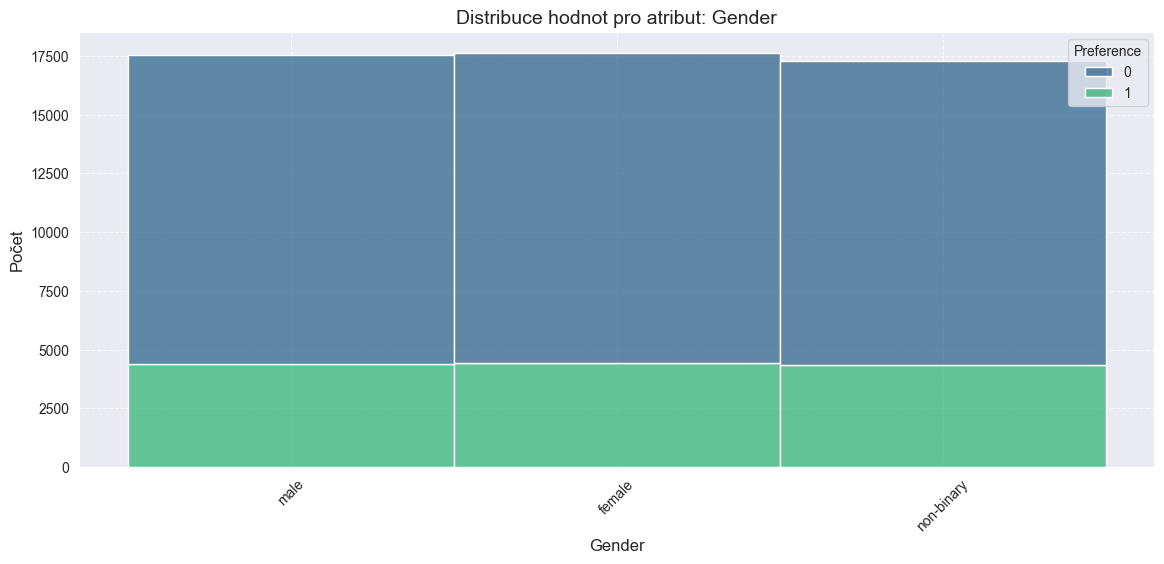

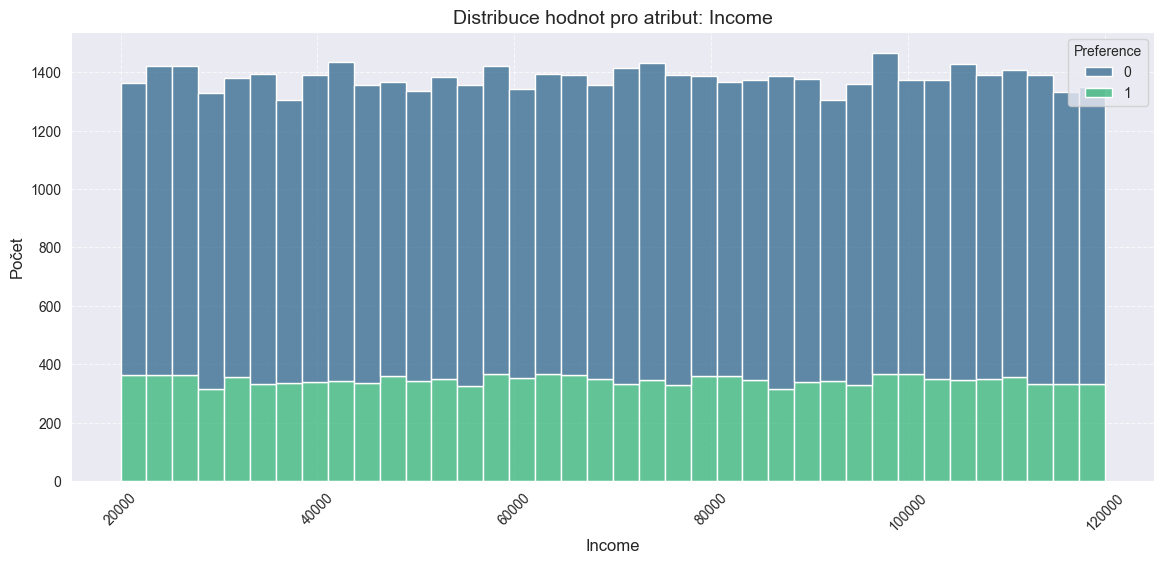

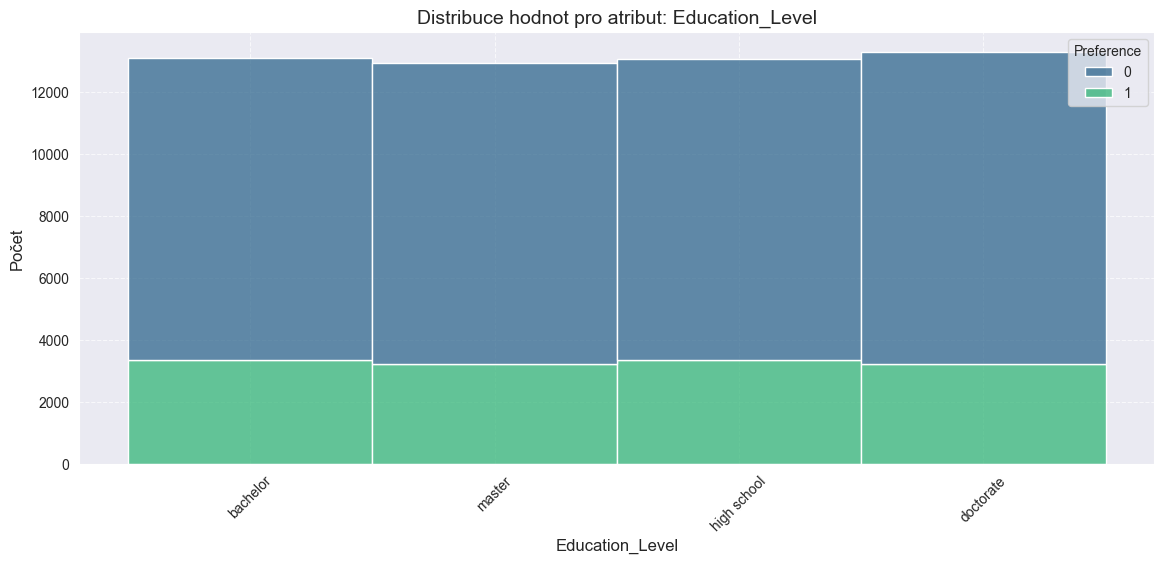

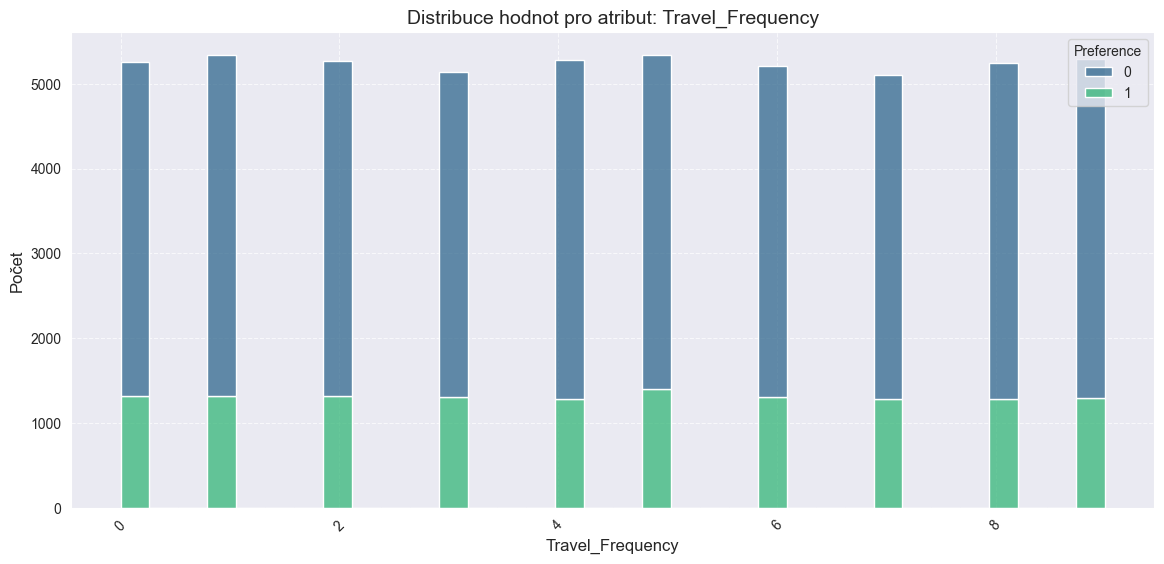

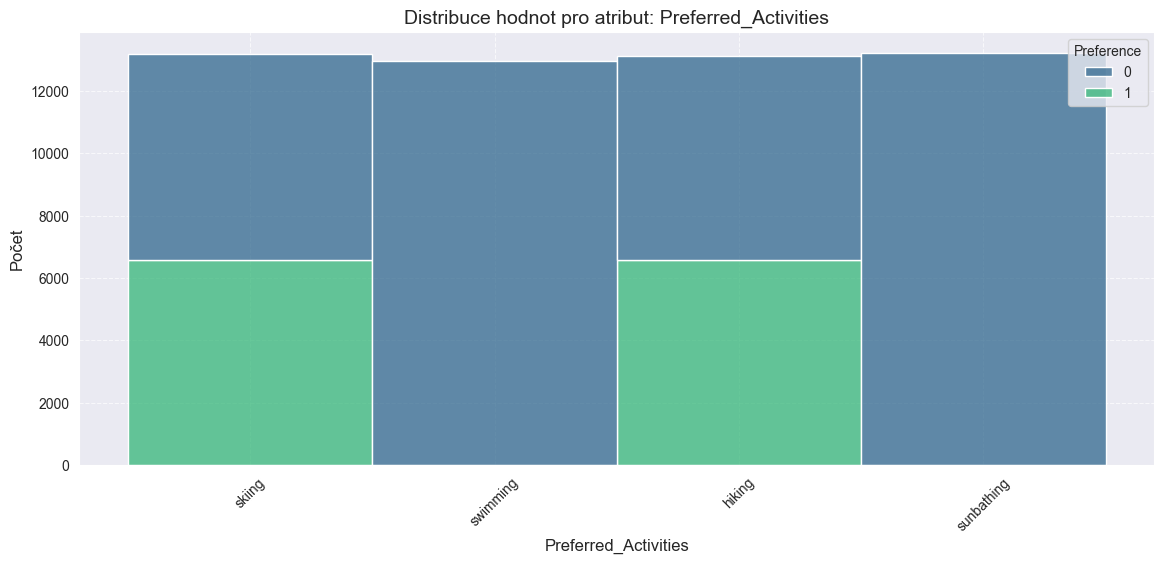

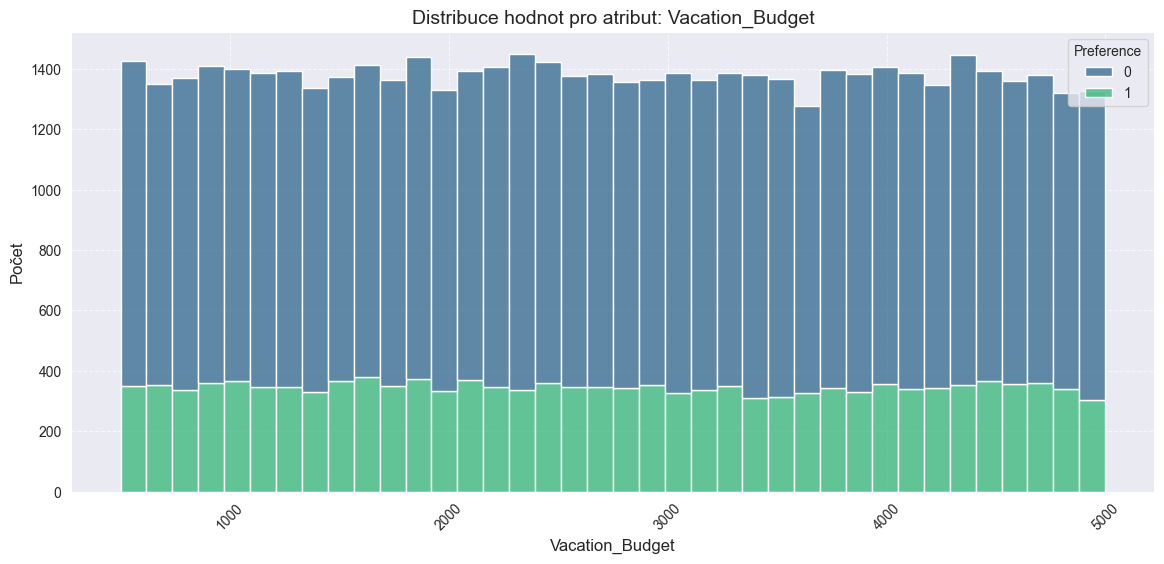

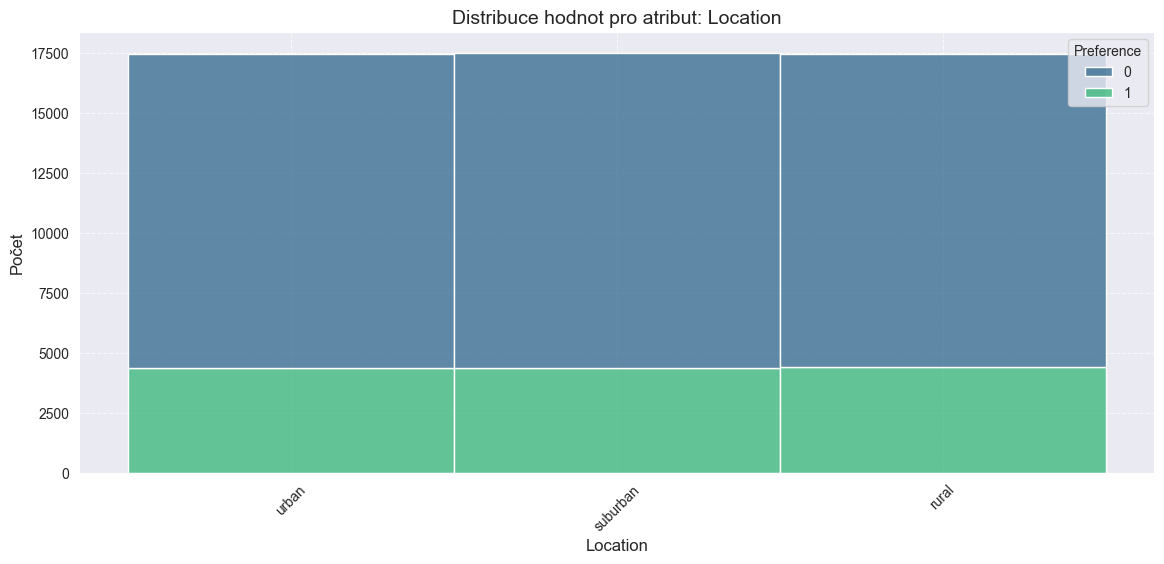

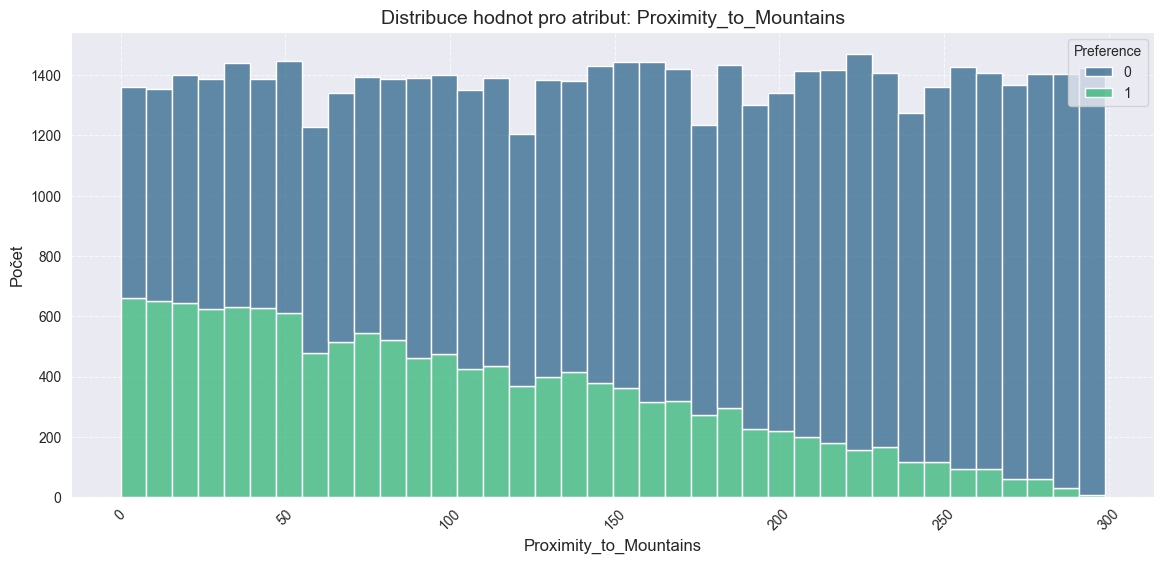

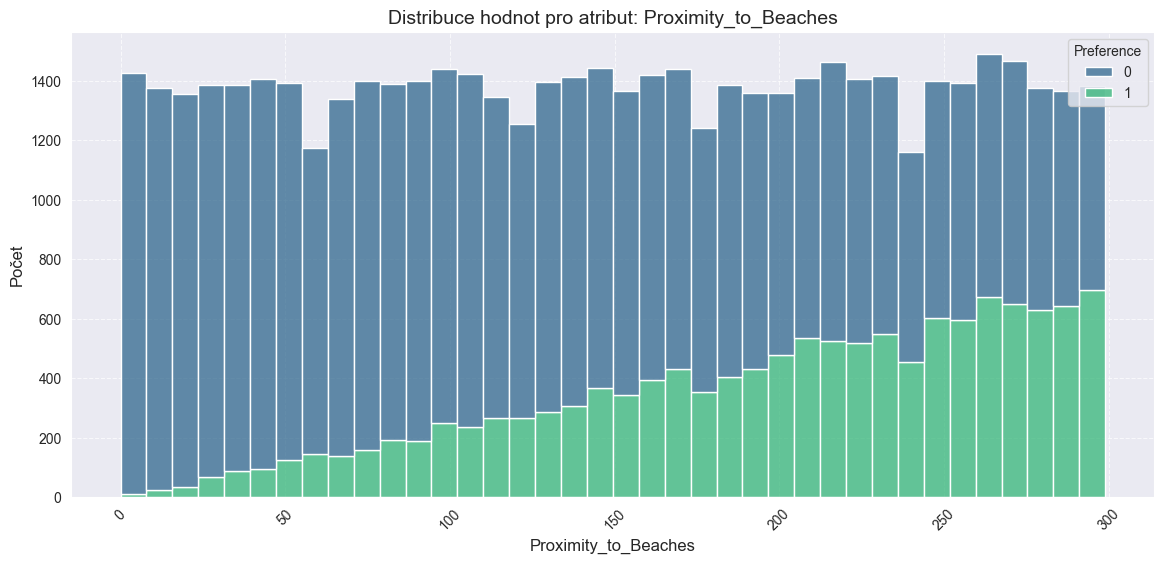

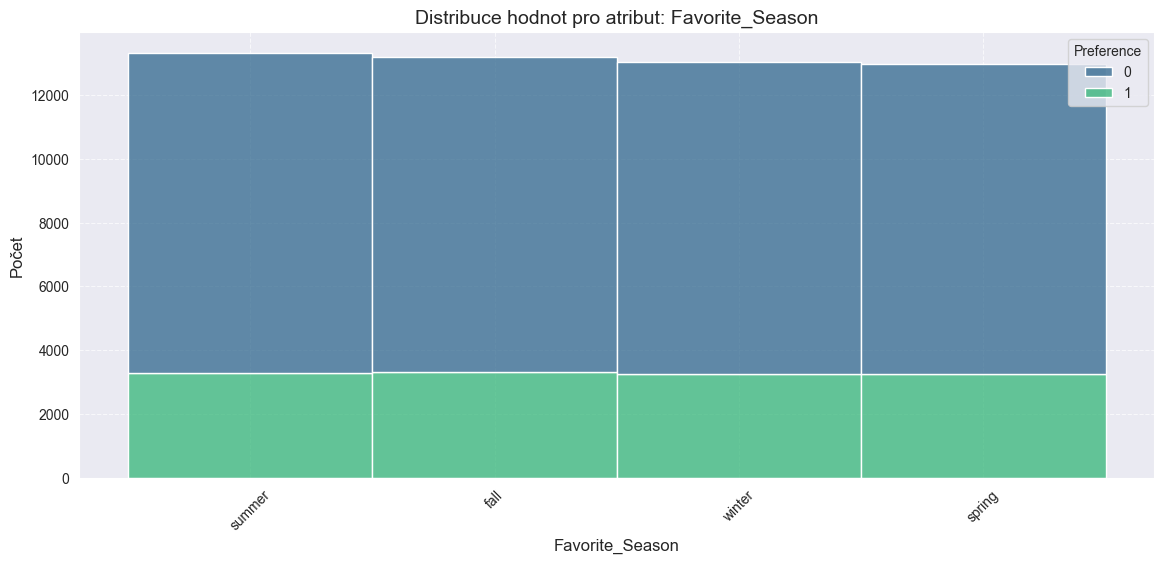

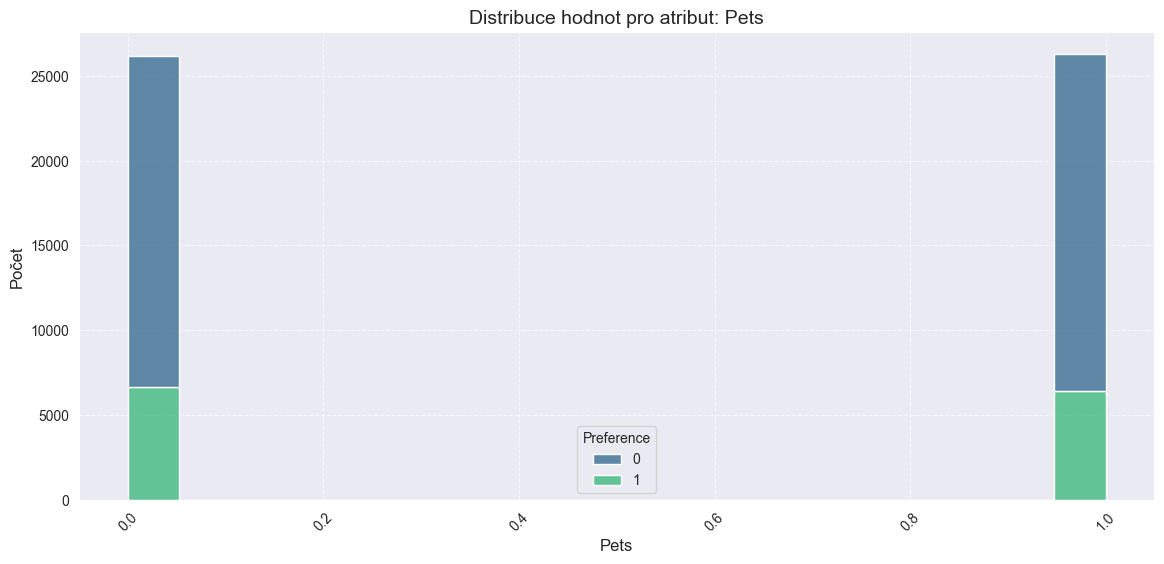

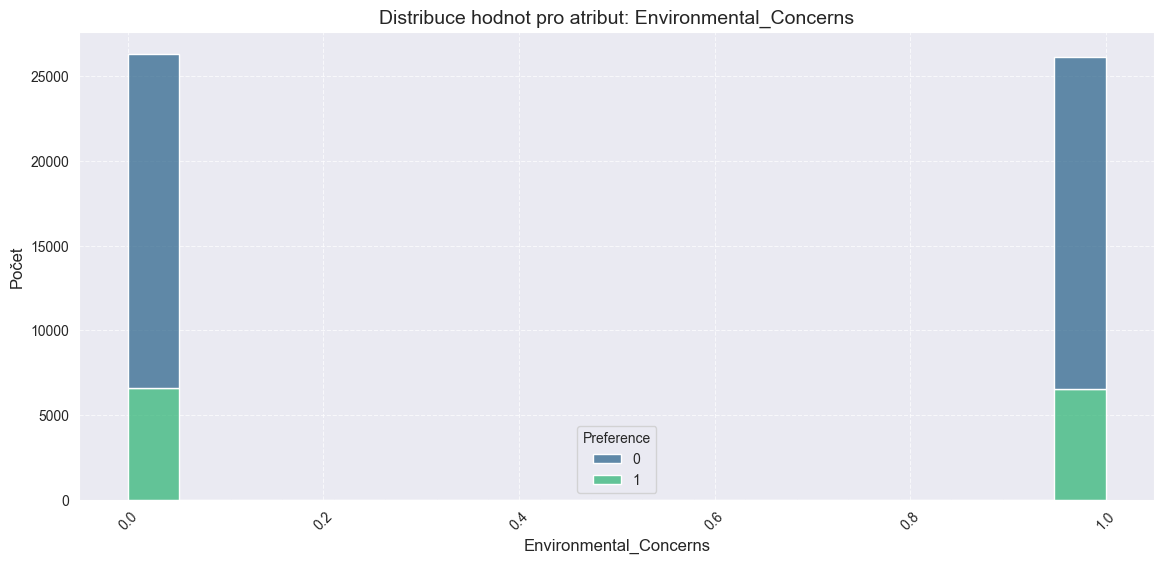

In [13]:
for column in df.columns:
    if column != "Preference":
        plt.figure(figsize=(12, 6))
        sns.histplot(data=df, x=column, hue="Preference", multiple="stack", palette="viridis")
        plt.title(f"Distribuce hodnot pro atribut: {column}", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel("Počet", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout(pad=2.0)
        plt.show()

### Distribuce numerických atributů

In [14]:
def plot_summary_numerical(_df, _column):
    plt.figure(figsize=(14, 7))

    mean = _df[_column].mean()
    median = _df[_column].median()

    plt.subplot(1, 2, 1)
    sns.histplot(data=_df, x=_column, kde=True)
    plt.title(f"Distribuce hodnot pro numerický atribut: {_column}")
    # put the median and mean values on the plot and show the legend on the left
    plt.axvline(mean, color='r', linestyle='--', label=f"Průměr: {mean:.2f}")
    plt.axvline(median, color='g', linestyle='--', label=f"Medián: {median:.2f}")
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=_df, x=_column)
    plt.title(f"Boxplot pro numerický atribut: {_column}")

    plt.show()

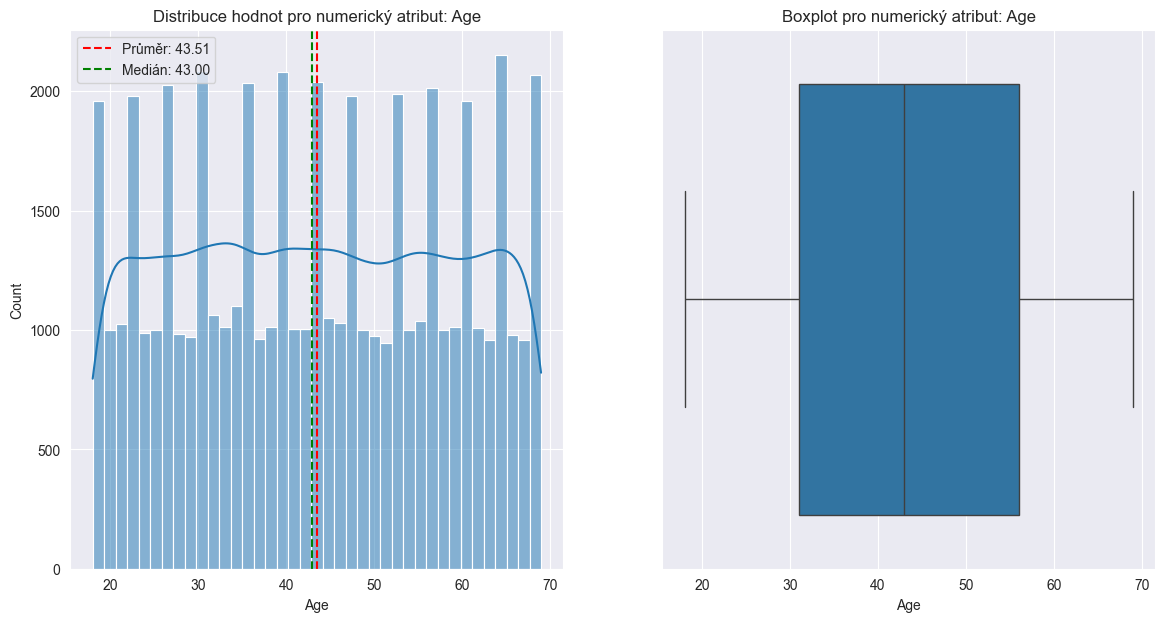

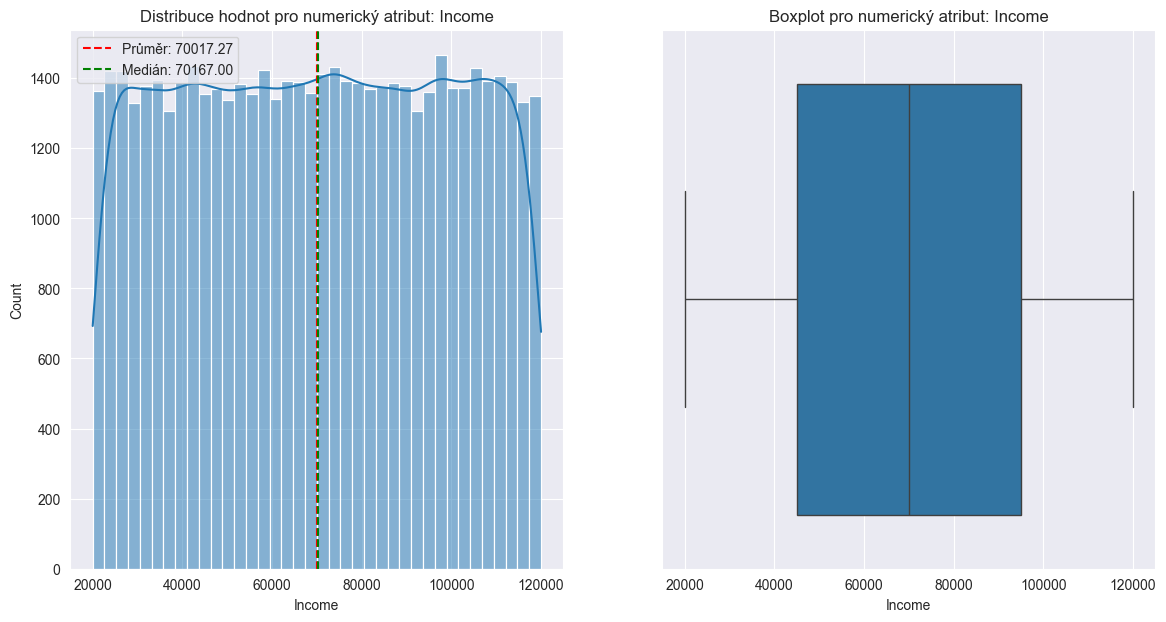

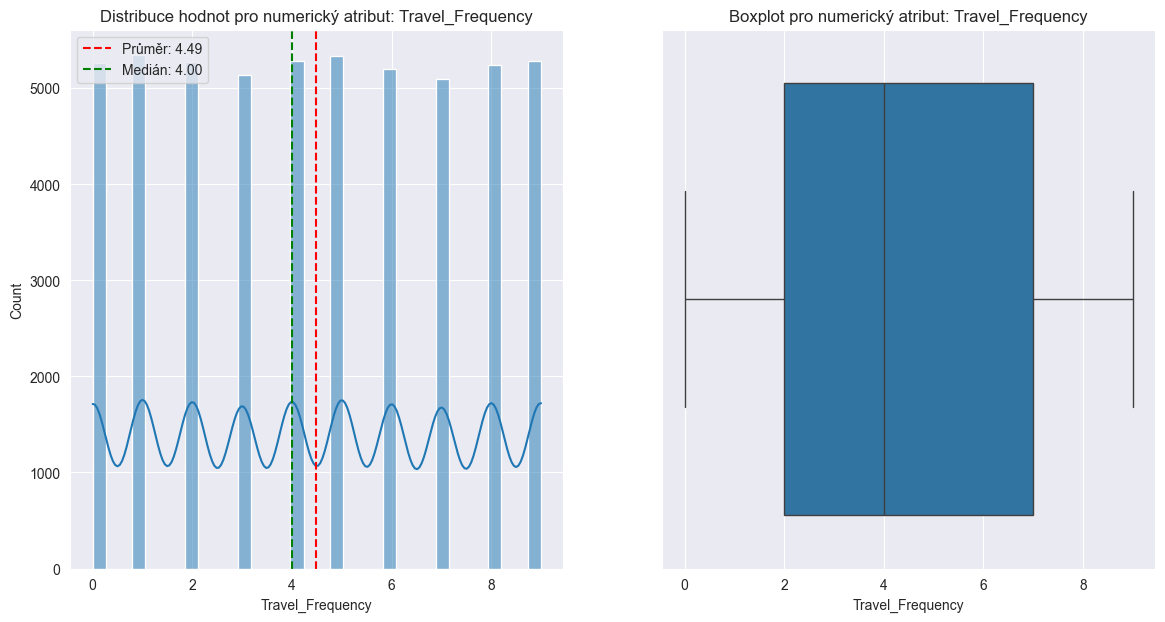

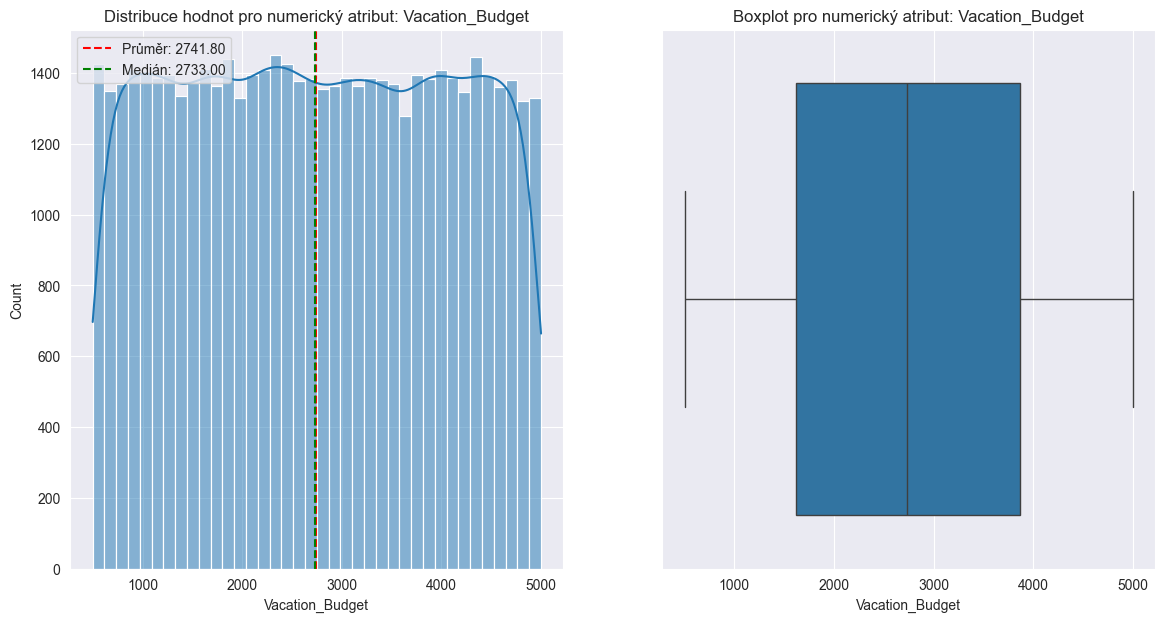

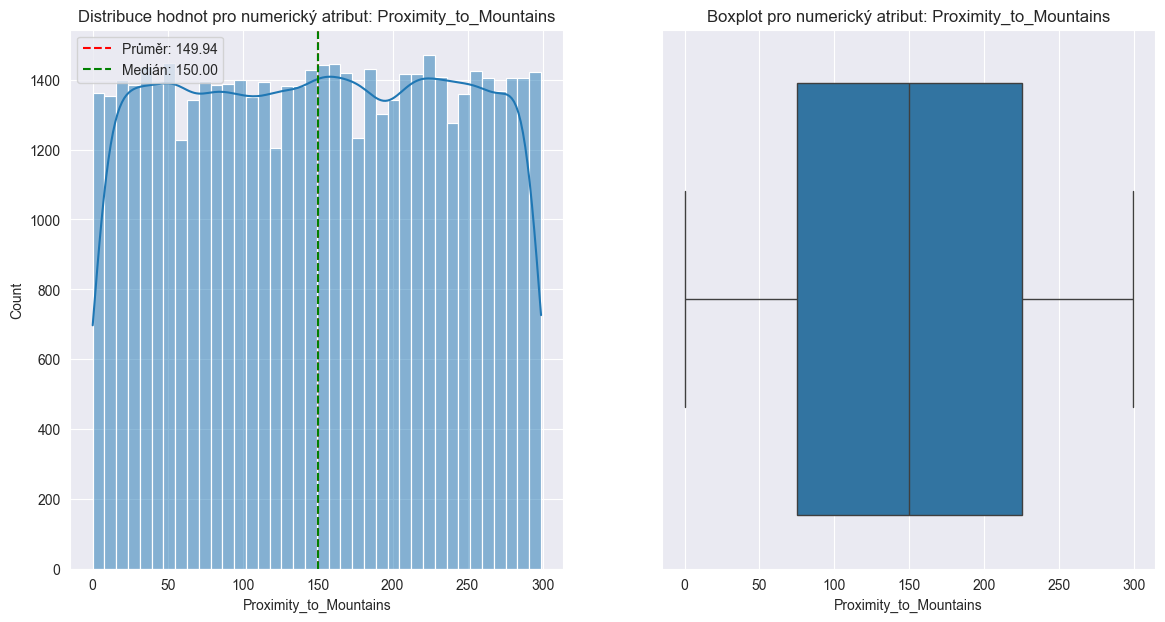

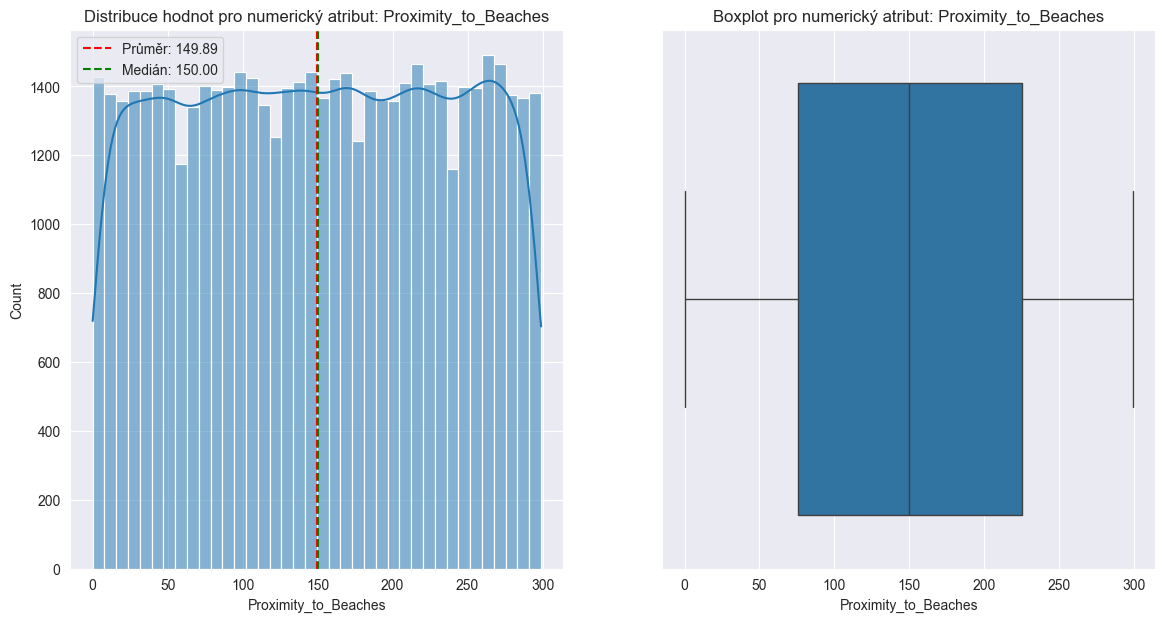

In [15]:
for column in numerical_columns:
    plot_summary_numerical(df, column)

### Binární atributy

In [16]:
def plot_summary_binary(_df, _column):
    print(pd.DataFrame({"Počet záznamů": _df[_column].value_counts(),
                        "Podíl záznamů (%)": _df[_column].value_counts(normalize=True) * 100}))

    values = _df[_column].value_counts()
    colors = sns.color_palette("viridis", len(values))

    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    sns.countplot(data=_df, x=_df[_column], hue=_df[_column], palette=colors, legend=False)
    plt.title(f"Počet záznamů pro binární atribut: {_column}")

    plt.subplot(1, 2, 2)
    plt.pie(x=values, labels=values.index, autopct="%.1f%%", startangle=90, colors=colors)
    plt.title(f"Podíl záznamů pro binární atribut: {_column}")

    plt.legend()
    plt.show()

      Počet záznamů  Podíl záznamů (%)
Pets                                  
1             26267          50.085806
0             26177          49.914194


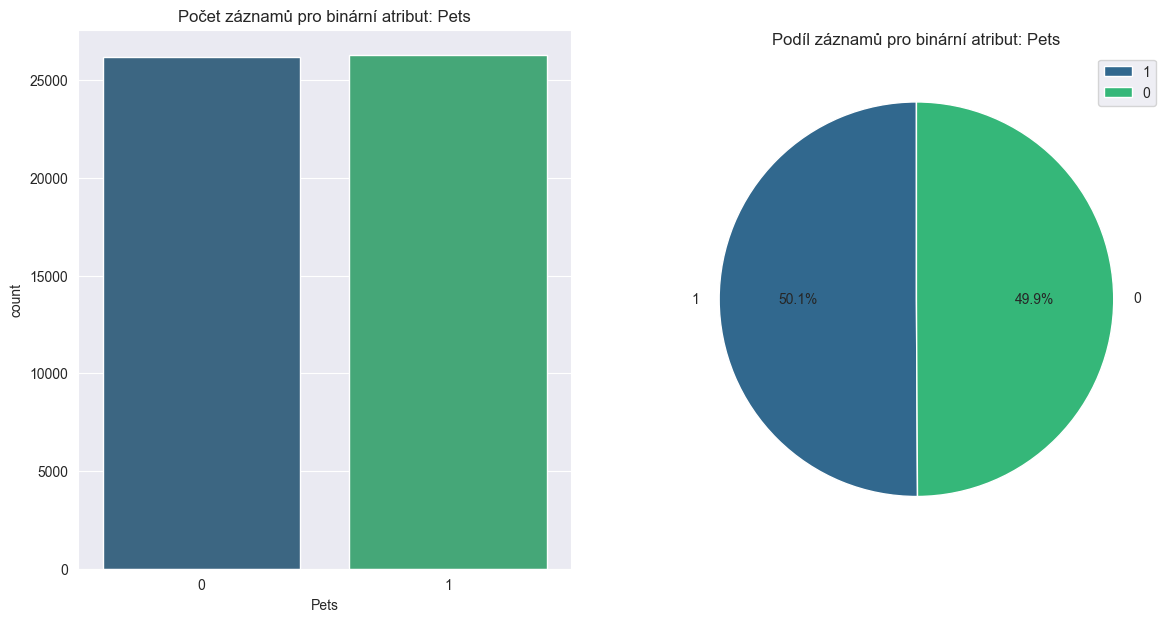

                        Počet záznamů  Podíl záznamů (%)
Environmental_Concerns                                  
0                               26304          50.156357
1                               26140          49.843643


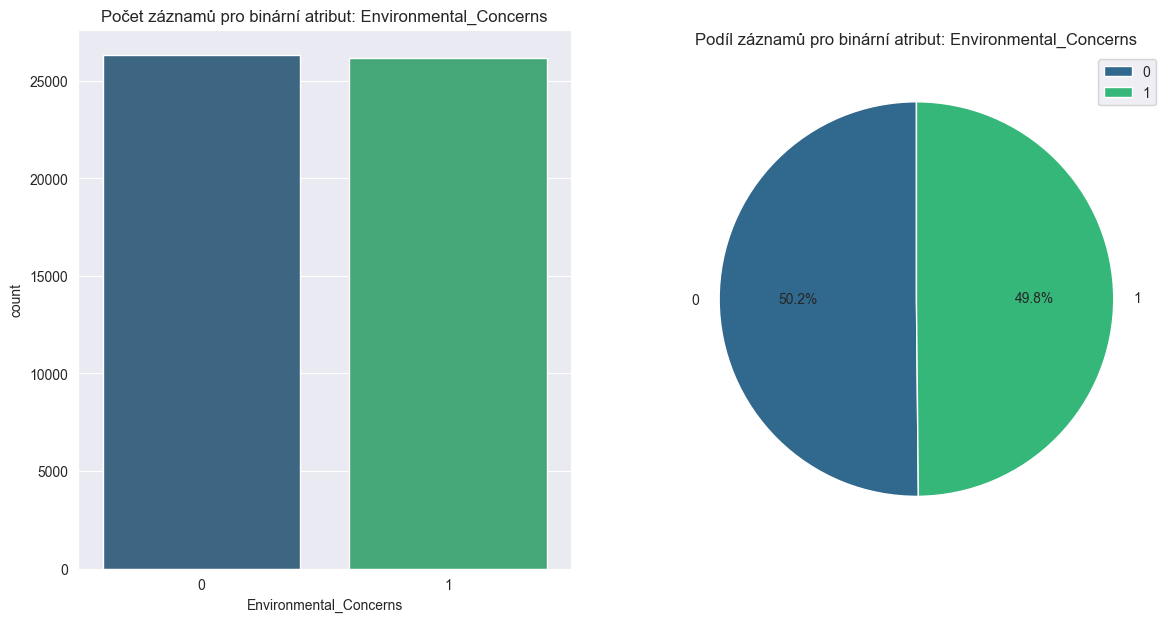

            Počet záznamů  Podíl záznamů (%)
Preference                                  
0                   39296          74.929449
1                   13148          25.070551


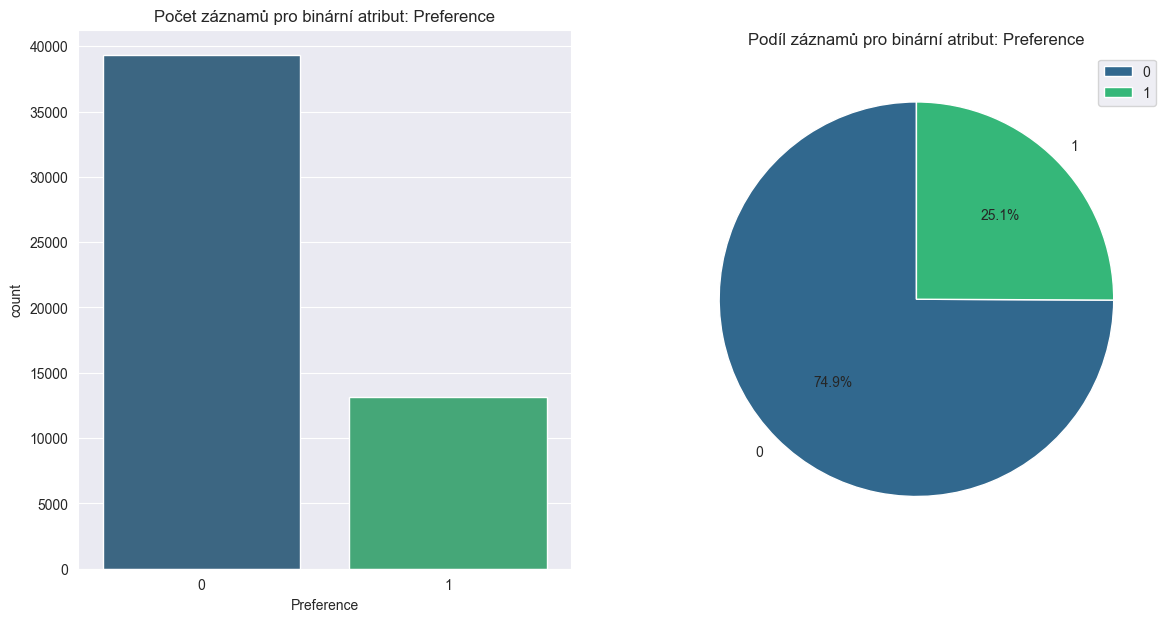

In [17]:
for column in binary_columns:
    plot_summary_binary(df, column)